In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
voice_data = pd.read_csv('voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice_data.isnull().sum().sum()

np.int64(0)

In [19]:
voice_data = pd.read_csv('voice_gender.csv')

X = voice_data.drop(columns=['label'])
y = voice_data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Задание 1

In [20]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

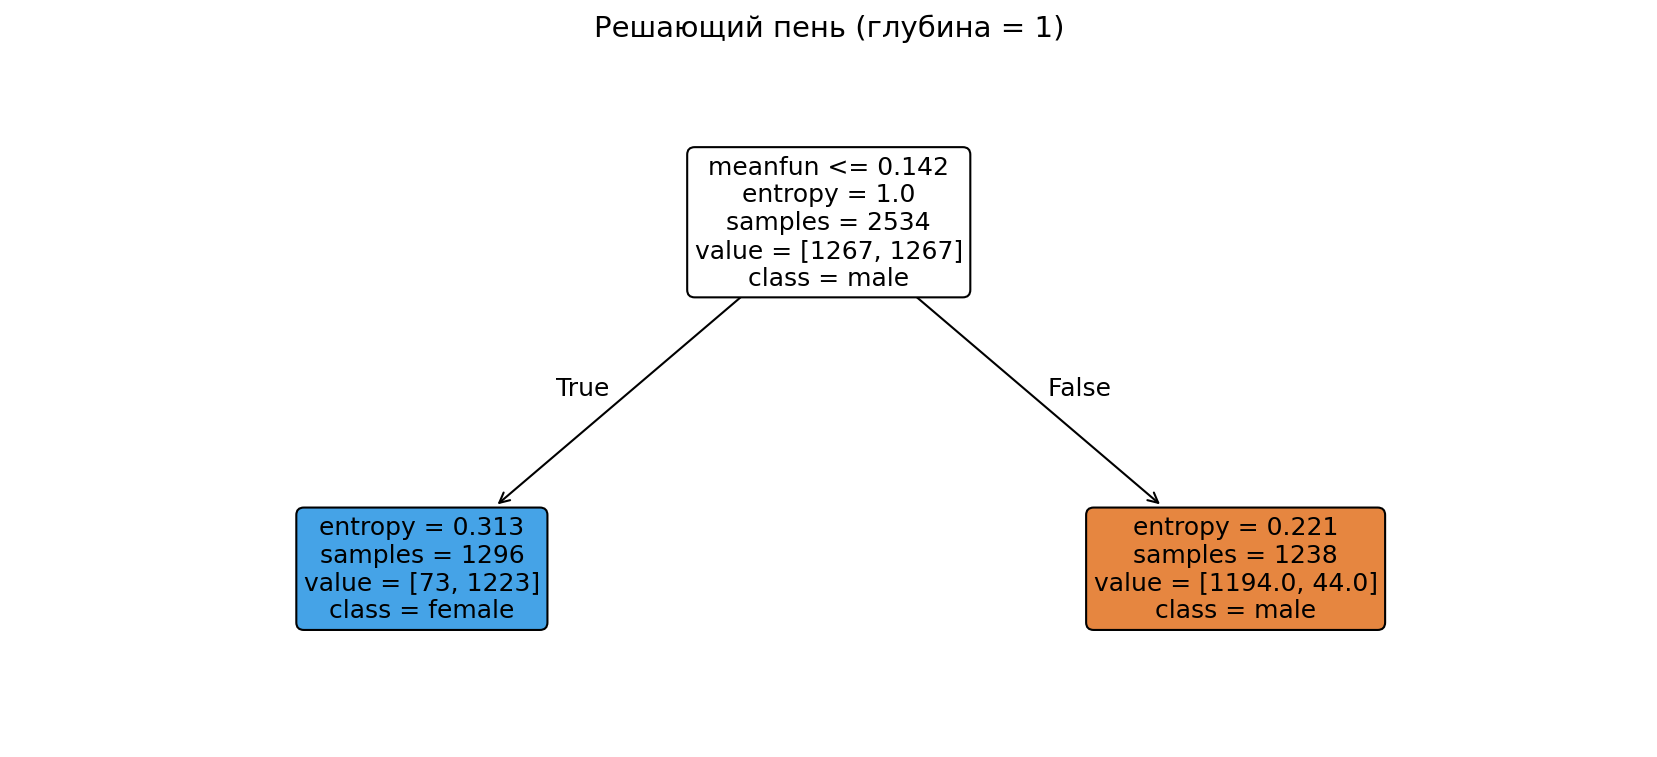

In [21]:
stump = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)
stump.fit(X_train, y_train)

plt.figure(figsize=(14, 6), dpi=150)
plot_tree(
    stump,
    feature_names=X.columns,
    class_names=['male', 'female'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Решающие пни (глубина = 1)', fontsize=14)
plt.show()

In [38]:
root_feature = X.columns[stump.tree_.feature[0]]
threshold = stump.tree_.threshold[0]
left_node_samples = stump.tree_.n_node_samples[1]
total_samples = len(X_train)
accuracy = accuracy_score(y_test, stump.predict(X_test))

print("1. Признак в корне дерева:", root_feature)
print(f"2. Пороговое значение: {threshold:.3f}")
print(f"3. Процент объектов в левом поддереве: {left_node_samples / total_samples * 100:.1f}")
print(f"4. Accuracy на тестовой выборке: {accuracy:.3f}")

1. Признак в корне дерева: meanfun
2. Пороговое значение: 0.142
3. Процент объектов в левом поддереве: 51.1
4. Accuracy на тестовой выборке: 0.956


Задание 2

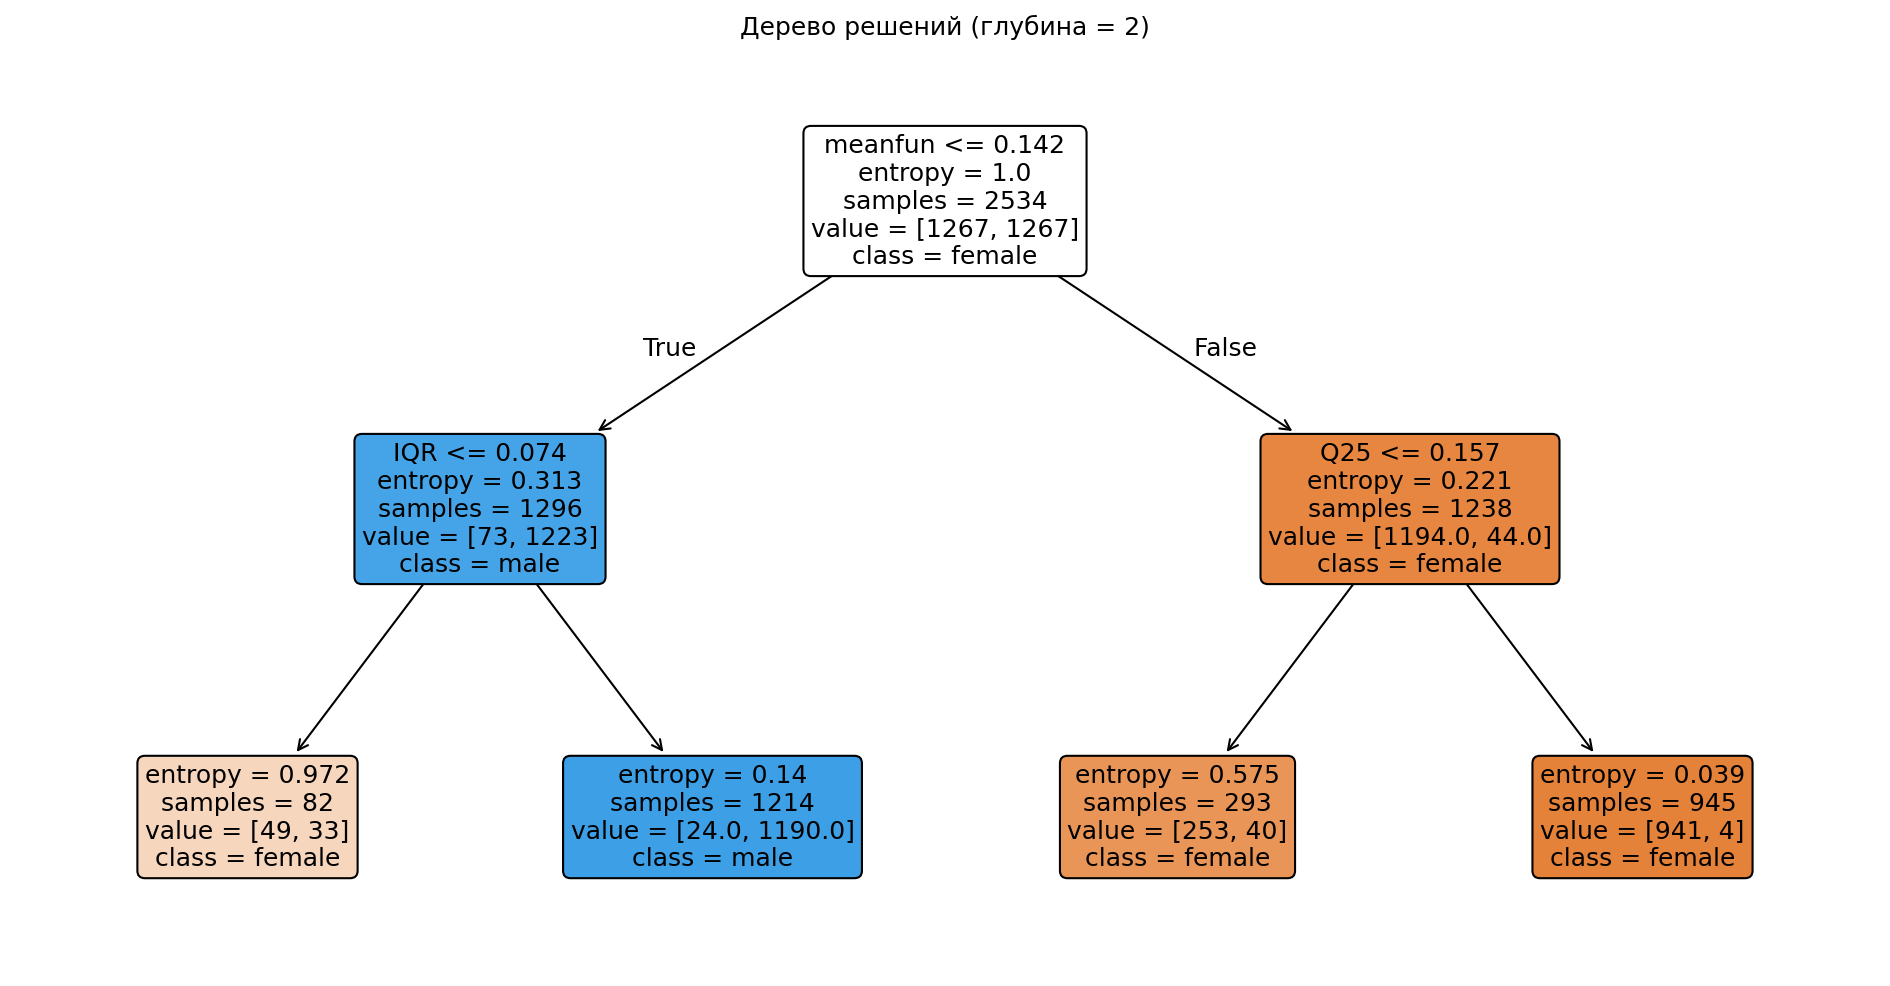

In [24]:
tree_depth2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree_depth2.fit(X_train, y_train)

plt.figure(figsize=(16, 8), dpi=150)
plot_tree(
    tree_depth2,
    feature_names=X.columns,
    class_names=tree_depth2.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Дерево решений (глубина = 2)")
plt.show()

In [25]:
used_features = set(tree_depth2.tree_.feature)
used_features = [X.columns[i] for i in used_features if i != -2]

leaf_values = tree_depth2.tree_.value
leaf_classes = np.argmax(leaf_values, axis=2).flatten()
leaf_node_ids = np.where(tree_depth2.tree_.children_left == -1)[0]
leaf_class_names = [tree_depth2.classes_[leaf_classes[i]] for i in leaf_node_ids]
num_female_leaves = leaf_class_names.count('female')

y_pred = tree_depth2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"1. Используемые признаки: {', '.join(used_features)}")
print(f"2. Количество листьев с классом 'female': {num_female_leaves}")
print(f"3. Accuracy на тестовой выборке: {accuracy:.3f}")

1. Используемые признаки: Q25, meanfun, IQR
2. Количество листьев с классом 'female': 3
3. Accuracy на тестовой выборке: 0.962


Задание 3

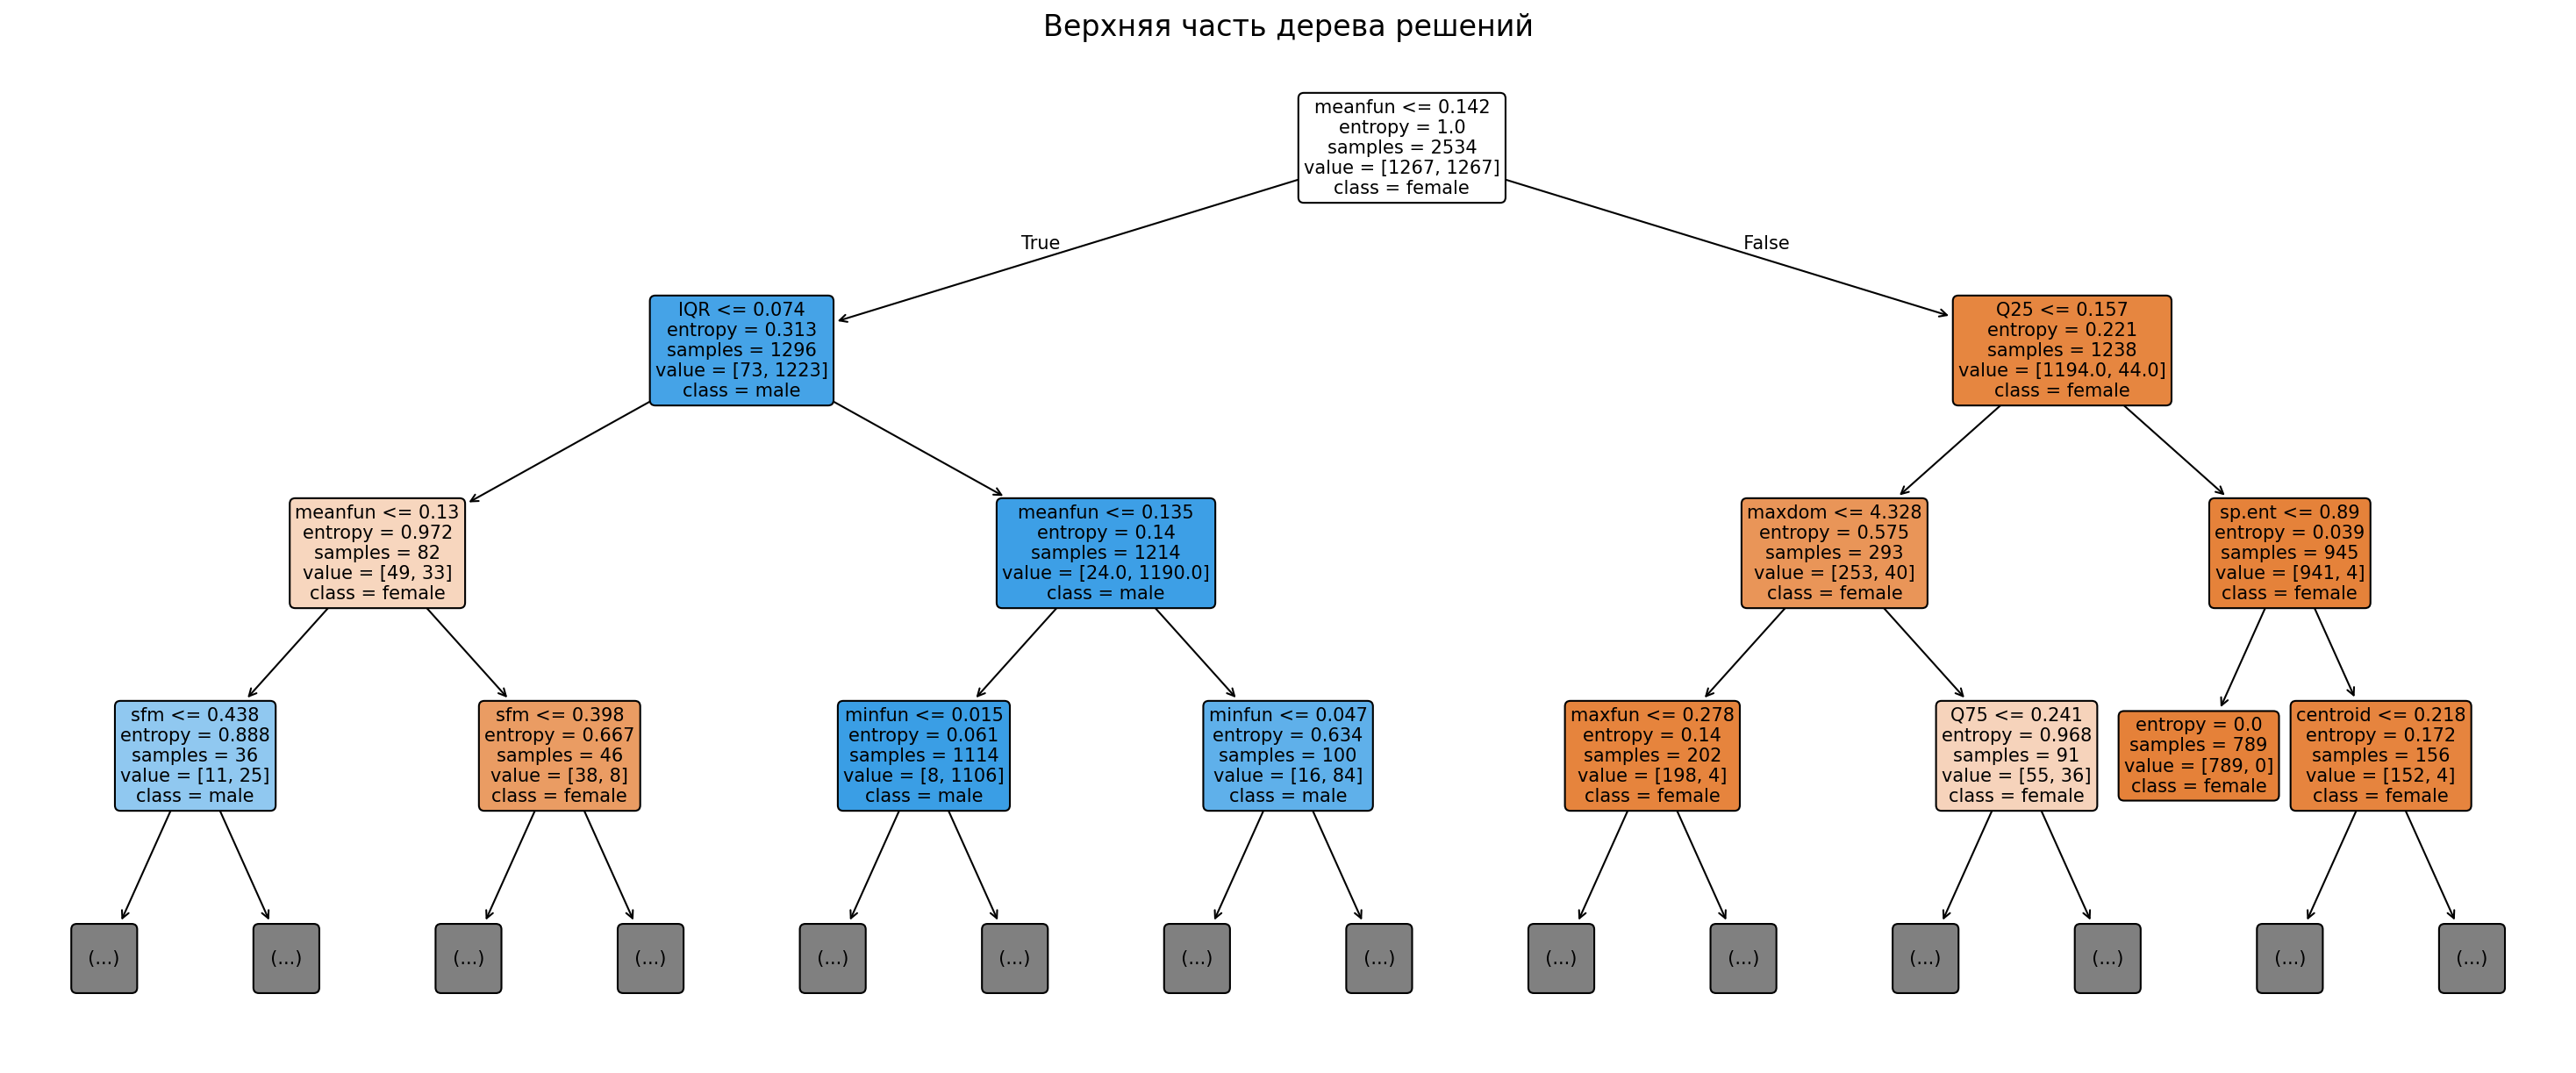

In [43]:
unlimited_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
unlimited_tree.fit(X_train, y_train)

plt.figure(figsize=(25, 10), dpi=150)
plot_tree(
    unlimited_tree,
    feature_names=X.columns,
    class_names=unlimited_tree.classes_,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # Показываем только верхние 3 уровня
)
plt.title("Верхняя часть дерева решений", fontsize=16)
plt.show()

In [29]:
depth = unlimited_tree.get_depth()
n_leaves = unlimited_tree.get_n_leaves()
train_acc = accuracy_score(y_train, unlimited_tree.predict(X_train))
test_acc = accuracy_score(y_test, unlimited_tree.predict(X_test))

print("1. Глубина дерева:", depth)
print("2. Количество листьев:", n_leaves)
print("3. Accuracy на обучающей выборке:", round(train_acc, 3))
print("4. Accuracy на тестовой выборке:", round(test_acc, 3))

1. Глубина дерева: 12
2. Количество листьев: 54
3. Accuracy на обучающей выборке: 1.0
4. Accuracy на тестовой выборке: 0.973


Задание 4

In [33]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10]
}

cv = StratifiedKFold(n_splits=5)
tree_model = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))

print("1. Критерий:", best_model.criterion)
print("2. Глубина:", best_model.max_depth)
print("3. min_samples_split:", best_model.min_samples_split)
print(f"4. Accuracy на train: {train_acc:.3f}")
print(f"   Accuracy на test: {test_acc:.3f}")

1. Критерий: gini
2. Глубина: 7
3. min_samples_split: 3
4. Accuracy на train: 0.996
   Accuracy на test: 0.970


Задание 5

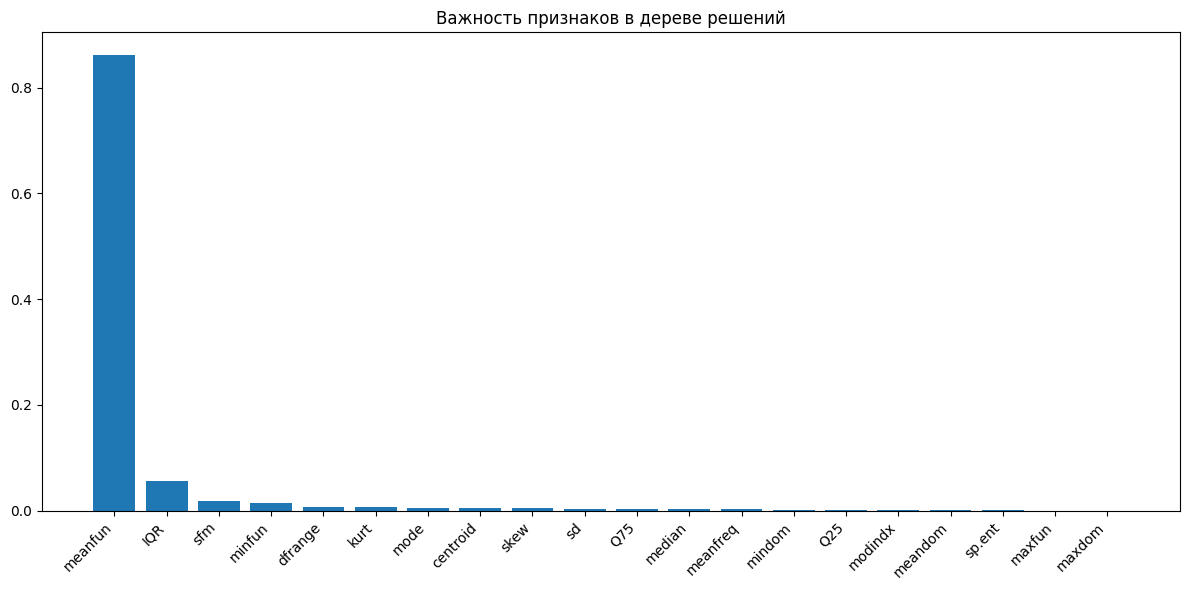

In [41]:
importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Признак': X.columns,
    'Важность': importances
}).sort_values(by='Важность', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Признак'], feature_importance_df['Важность'])
plt.title('Важность признаков в дереве решений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
top3 = feature_importance_df.head(3)
print("Топ-3 признака по важности:")
print(top3)

Топ-3 признака по важности:
    Признак  Важность
12  meanfun  0.861347
5       IQR  0.056810
9       sfm  0.018004
